# PASSO 1 

A - Carregar os dados

B - Tratamento dos dados

C - Realizar a analise exploratoria das váriaveis para compreender os dados estão distribuidos

D - Feature Selection (Escolha das variáveis mais relevantes para serem utilizadas no modelo)

E - Padronização das Variaveis

F - Remover os registros que possuem OUTLIERS - Regressão Logística tem dificuldade com dados outliers

G - Balanceamento dos dados - Caso exista mais dados de uma classificação

# PASSO 2

A - SPLIT do dataset treino/teste com divisão 70% por 30%

B - Escolhado dos Modelos a ser utilizado

C - Cross-Validation

D - Confusion Matriz (originais VS previstos)

E - Otimização do modelo (ajuste dos parametros)


# PASSO 3

A - Tratamento dos dados 

B - Predict - previsão dos dados 

C - Exibição dos dados finais

# Descrições das Variáveis

1."state", string. código alfabético do estado de residência do cliente nos EUA

2."account_length", numerical. Número de meses que o cliente está com o
provedor de telecomunicações atual

3."area_code", string="area_code_AAA" where AAA = 3 dígito do código de área.

4."international_plan", (yes/no). O cliente possui plano internacional.

5."voice_mail_plan", (yes/no). O cliente possui plano de correio de voz.

6."number_vmail_messages", numerical. Número de mensagens de correio de voz.

7."total_day_minutes", numerical. Total de minutos de chamadas diárias.

8."total_day_calls", numerical. Total de minutos de chamadas diárias.

9."total_day_charge", numerical. Cobrança total das chamadas diurnas.

10."total_eve_minutes", numerical. Total de minutos de ligações noturnas.

11."total_eve_calls", numerical. Número total de ligações noturnas.

12."total_eve_charge", numerical. Cobrança total das chamadas noturnas.

13."total_night_minutes", numerical. Total de minutos de chamadas noturnas.

14."total_night_calls", numerical. Número total de chamadas noturnas.

15."total_night_charge", numerical. Cobrança total das chamadas noturnas.

16."total_intl_minutes", numerical. Total de minutos de chamadas internacionais.

17."total_intl_calls", numerical. Número total de chamadas internacionais.

18."total_intl_charge", numerical. Custo total de chamadas internacionais.

19."number_customer_service_calls", numerical. Número de ligações para atendimento ao cliente.

20."churn", (yes/no). Customer churn - target variable.

# START
IMPORTAÇÃO DAS BIBLIOTECAS & PACOTES

In [1]:
# Biblioteca para manipulação de Dados
import pandas as pd

# Biblioteca para plotar os gráficos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Biblioteca para operação matemáticas de matrizes e arrays
import numpy as np

# Biblioteca para filtrar warnings e não apresentar na tela
import warnings
warnings.filterwarnings("ignore")

# Biblioteca utilizada durante as operações de Feature Selection e Treinamento do Modelo
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

# Biblioteca utilizada durante a padronização dos dados
from sklearn.preprocessing import StandardScaler

# Biblioteca utilizada para realizar o balanceamento dos dados
#!pip install imblearn (instalação do pacote caso não exista)
from imblearn.over_sampling import SMOTE

# Bibilioteca utilizada durante o split dos dados em treino e teste
from sklearn.model_selection import train_test_split

# Biblioteca utilizada para avaliação do modelo criado
from sklearn import metrics

# Biblioteca utilizada para realizar o cross-validation com os dados teste
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Biblioteca utilizada para otimização de hyper-parametros
from sklearn.model_selection import GridSearchCV

# Passo 1: A - Carregar os Dados

In [2]:
#CARREGANDO OS DATASETs
df_train = pd.read_csv('projeto4_telecom_treino.csv')
df_test = pd.read_csv('projeto4_telecom_teste.csv')

In [3]:
#VERIFICANDO O TYPE 
print(type(df_test), type(df_train))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [4]:
#VIZUALIZANDO OS 15 REGISTROS DO DATASET
pd.set_option('max_colwidth', -1)#Quando a coluna transborda, um marcador “…”
df_train.head(15)

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
5,6,AL,118,area_code_510,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,no
6,7,MA,121,area_code_510,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
7,8,MO,147,area_code_415,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,no
8,9,LA,117,area_code_408,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,no
9,10,WV,141,area_code_415,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,no


In [5]:
#VISUALIZANDO AS INFORMAÇÕES DO DATASET
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
Unnamed: 0                       3333 non-null int64
state                            3333 non-null object
account_length                   3333 non-null int64
area_code                        3333 non-null object
international_plan               3333 non-null object
voice_mail_plan                  3333 non-null object
number_vmail_messages            3333 non-null int64
total_day_minutes                3333 non-null float64
total_day_calls                  3333 non-null int64
total_day_charge                 3333 non-null float64
total_eve_minutes                3333 non-null float64
total_eve_calls                  3333 non-null int64
total_eve_charge                 3333 non-null float64
total_night_minutes              3333 non-null float64
total_night_calls                3333 non-null int64
total_night_charge               3333 non-null float64
total_intl_minutes           

*Com base nos dados observados é possível notar que algumas variáveis podem ter seu tipo transformado de "object" variáveis numéricas.

# Passo 1: B - Tratamento de dados

In [6]:
# REMOVENDO A COLUNA [Unnamed: 0] que está caracterizando a sequência de registros do Dataset.
df_train = df_train.drop('Unnamed: 0', axis=1)
df_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [7]:
# Verificando os valores distintos de cada coluna do dataset
for i in df_train.columns:
    x = df_train[i].unique()
    print(x)


['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
[128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69 186 171  28 153 169  13  27   3  42 189 156 134 243  23   1 205
 200   5  

In [8]:
# Conte observações distintas sobre o eixo solicitado de cada coluna do dataset
for i in df_train.columns:
    x = df_train[i].nunique()
    print(x)

51
212
3
2
2
46
1667
119
1667
1611
123
1440
1591
120
933
162
21
162
10
2


In [9]:
#Exibe os valores distintos da coluna state
df_train['state'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [10]:
# Função que será utilizada para transforma algumas variáveis string em Numéricas através de um mapeamento de dict.
def transformColumns(dataset):
    
    # Transforma as strings de valores Yes/No em 1/0 e atribui em um nvo campo, exceto a variável target Churn
    dictmapYesNo = {"yes": 1, "no": 0}
    
    dataset['international_plan_num'] = dataset['international_plan'].map(dictmapYesNo)
    dataset['voice_mail_plan_num'] = dataset['voice_mail_plan'].map(dictmapYesNo)    
    dataset['churn'] = dataset['churn'].map(dictmapYesNo)
        
    # Remove as strings dos códigos de Area, preservando somente o código em um novo campo
    dictmapAreaCode = {"area_code_415": 0, "area_code_408": 1, "area_code_510": 2}

    dataset['area_code_num'] = dataset['area_code'].map(dictmapAreaCode)
    
    #Transforma o valor da coluna State em valor numerico aleatorio apartir 1000
    dictmapState = {'KS': 1000, 'OH': 1001, 'NJ': 1002, 'OK': 1003, 'AL': 1004, 'MA': 1005, 
                    'MO': 1006, 'LA': 1007, 'WV': 1008, 'IN': 1009, 'RI': 1010, 
                    'IA': 1011, 'MT': 1012, 'NY': 1013, 'ID': 1014, 'VT': 1015, 
                    'VA': 1016, 'TX': 1017, 'FL': 1018, 'CO': 1019, 'AZ': 1020, 
                    'SC': 1021, 'NE': 1022, 'WY': 1023, 'HI': 1024, 'IL': 1025, 
                    'NH': 1026, 'GA': 1027, 'AK': 1028, 'MD': 1029, 'AR': 1030, 
                    'WI': 1031, 'OR': 1032, 'MI': 1033, 'DE': 1034, 'UT': 1035, 
                    'CA': 1036, 'MN': 1037, 'SD': 1038, 'NC': 1039, 'WA': 1040, 
                    'NM': 1041, 'NV': 1042, 'DC': 1043, 'KY': 1044, 'ME': 1045, 
                    'MS': 1046, 'TN': 1047, 'PA': 1048, 'CT': 1049, 'ND': 1050
                   }
    
    dataset['state_num'] = dataset['state'].map(dictmapState)
  

    # Transforma as variáveis que eram strings em Dados Categóricas
    # https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html
    dataset['international_plan'] = dataset['international_plan'].astype('category')
    dataset['voice_mail_plan']    = dataset['voice_mail_plan'].astype('category')    
    dataset['area_code']          = dataset['area_code'].astype('category')
    dataset['state']              = dataset['state'].astype('category')

    # Reordenando as colunas para que a coluna TARGET (churn) seja a última coluna do Dataframe
    dataset = dataset[[col for col in dataset if col not in ['churn']] + ['churn']]    
    
    return dataset


In [11]:
df_train = transformColumns(df_train)

In [12]:
#Verificando Tipo das colunas modificadas
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 24 columns):
state                            3333 non-null category
account_length                   3333 non-null int64
area_code                        3333 non-null category
international_plan               3333 non-null category
voice_mail_plan                  3333 non-null category
number_vmail_messages            3333 non-null int64
total_day_minutes                3333 non-null float64
total_day_calls                  3333 non-null int64
total_day_charge                 3333 non-null float64
total_eve_minutes                3333 non-null float64
total_eve_calls                  3333 non-null int64
total_eve_charge                 3333 non-null float64
total_night_minutes              3333 non-null float64
total_night_calls                3333 non-null int64
total_night_charge               3333 non-null float64
total_intl_minutes               3333 non-null float64
total_intl_calls   

In [13]:
#visualizar o Dataframe
df_train.head(10)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,international_plan_num,voice_mail_plan_num,area_code_num,state_num,churn
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,...,11.01,10.0,3,2.70,1,0,1,0,1000,0
1,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,...,11.45,13.7,3,3.70,1,0,1,0,1001,0
2,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,...,7.32,12.2,5,3.29,0,0,0,0,1002,0
3,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,...,8.86,6.6,7,1.78,2,1,0,1,1001,0
4,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,...,8.41,10.1,3,2.73,3,1,0,0,1003,0
5,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,...,9.18,6.3,6,1.70,0,1,0,2,1004,0
6,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,...,9.57,7.5,7,2.03,3,0,1,2,1005,0
7,MO,147,area_code_415,yes,no,0,157.0,79,26.69,103.1,...,9.53,7.1,6,1.92,0,1,0,0,1006,0
8,LA,117,area_code_408,no,no,0,184.5,97,31.37,351.6,...,9.71,8.7,4,2.35,1,0,0,1,1007,0
9,WV,141,area_code_415,yes,yes,37,258.6,84,43.96,222.0,...,14.69,11.2,5,3.02,0,1,1,0,1008,0


# Passo 1: C - Realizar a analise exploratoria das váriaveis para compreender os dados estão distribuidos

In [14]:
#SUMÁRIO ESTATÍSTICO
pd.set_option('display.max_columns', None)#imprprime se max_cols for excedido, alterne para a visualização truncada
pd.set_option('display.expand_frame_repr', False )#imprimi df largos em varia linhas
pd.set_option('max_colwidth', -1)#Quando a coluna transborda, um marcador “…”
df_train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,international_plan_num,voice_mail_plan_num,area_code_num,state_num,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.096910,0.276628,0.755476,1024.269127,0.144914
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.295879,0.447398,0.830054,14.736558,0.352067
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000,0.000000,0.000000,1012.000000,0.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000,0.000000,1.000000,1024.000000,0.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000,1.000000,2.000000,1037.000000,0.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000,1.000000,2.000000,1050.000000,1.000000


In [15]:
df_train.isnull().values.any()

False

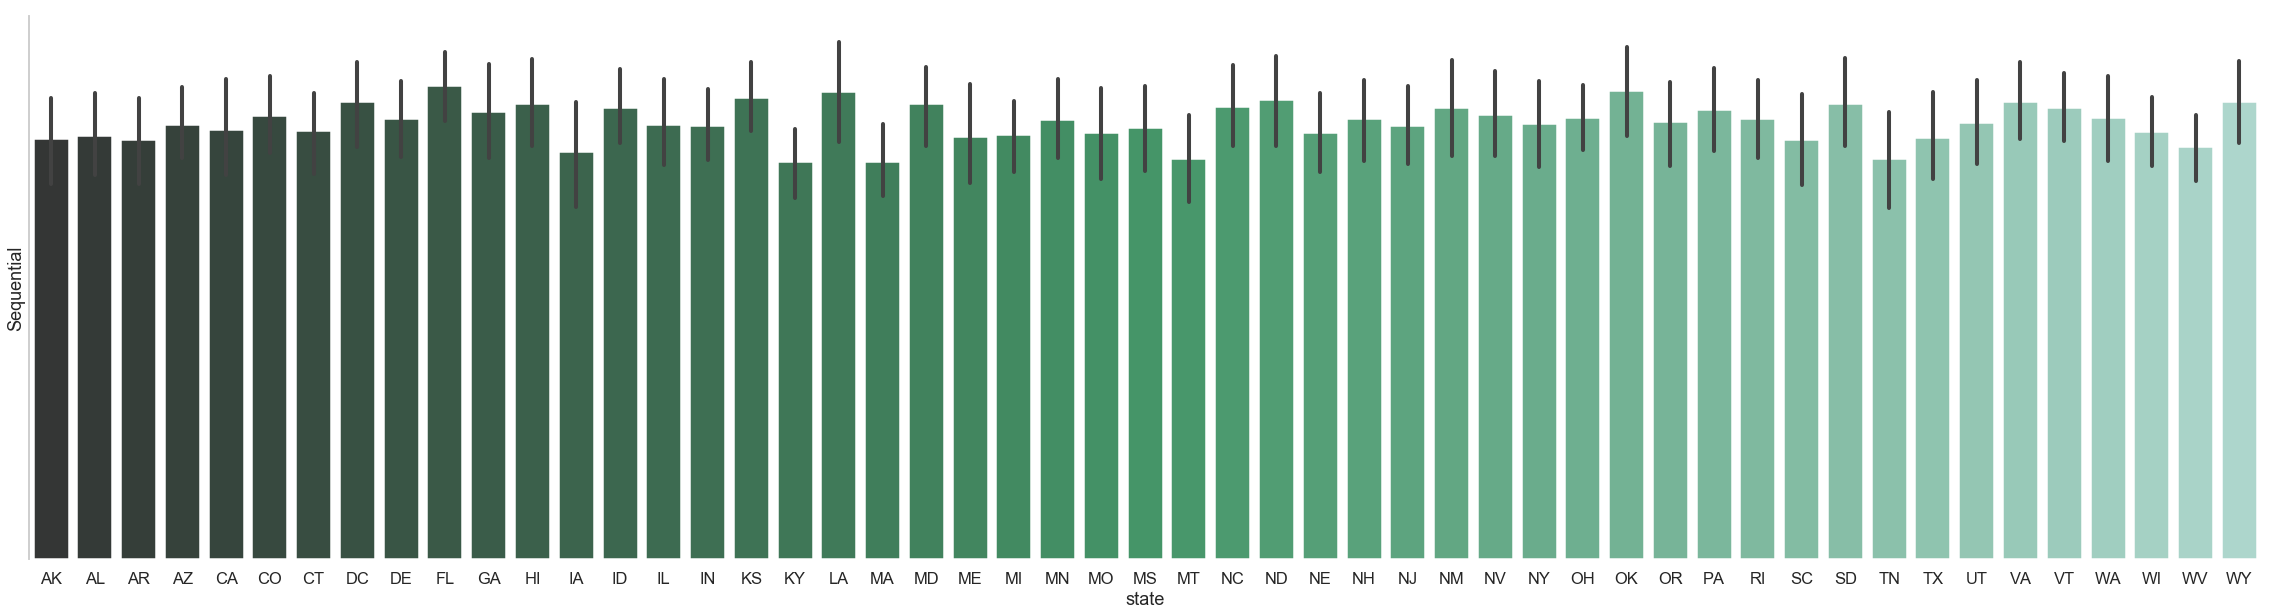

In [16]:
sns.set(style="whitegrid", context="talk")
f, (ax1) = plt.subplots(1, 1, figsize=(40, 10), sharex=True)
x = df_train['state']
y1 = df_train['account_length']
sns.barplot(x, y1, palette="BuGn_d", ax=ax1)
ax1.set_ylabel("Sequential")
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.show()

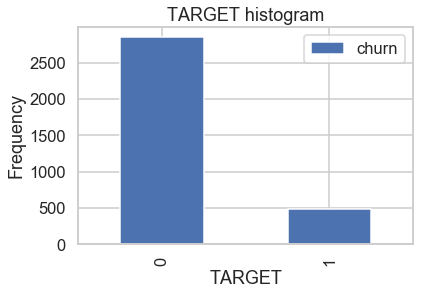

In [17]:
#Distribuição da classe TARGET
pd.value_counts(df_train['churn']).plot.bar()
plt.title('TARGET histogram')
plt.xlabel('TARGET')
plt.ylabel('Frequency')
plt.legend()

plt.savefig('f.jpg')


In [18]:
Count_No = len(df_train[df_train['churn']==0])
Count_Yes = len(df_train[df_train['churn']==1])

print ("Percentual de Clientes que Cancelaram: ", round((Count_Yes / (Count_Yes+Count_No))*100,6))
print ("Percentual de Clientes que Não Cancelaram: ", round((Count_No / (Count_Yes+Count_No))*100,6))

Percentual de Clientes que Cancelaram:  14.491449
Percentual de Clientes que Não Cancelaram:  85.508551


Como podemos notar os dados estão desbalanceados, usaremos técnicas  de balanceamento para que 
o modelo não fique tendencioso.

# Gerar histrogramas para melhor compreensão

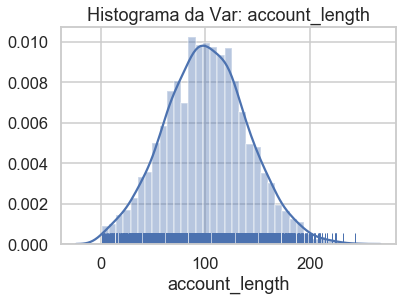

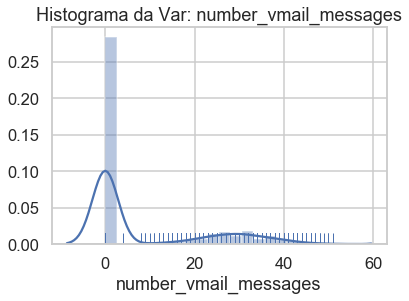

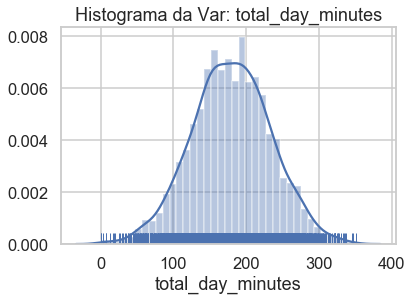

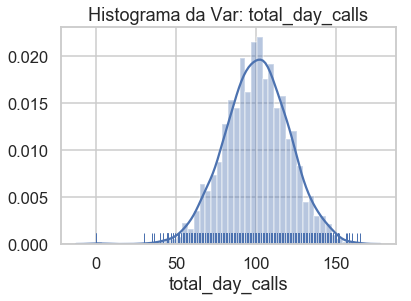

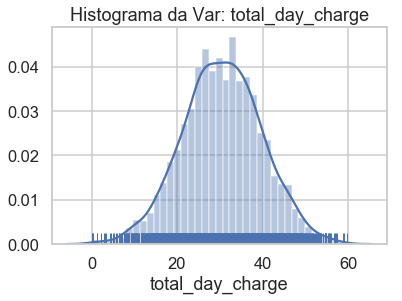

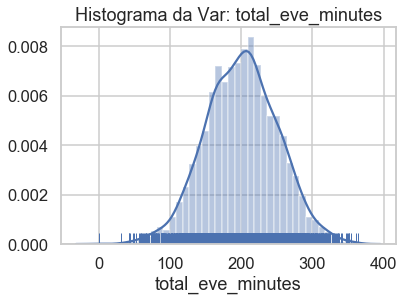

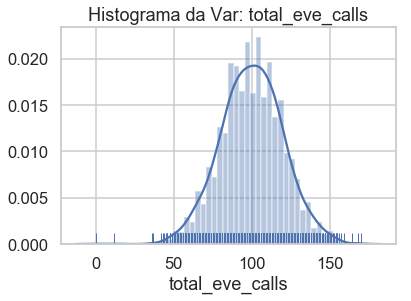

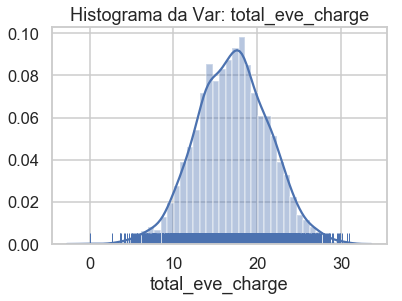

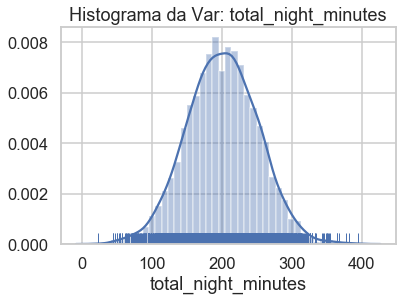

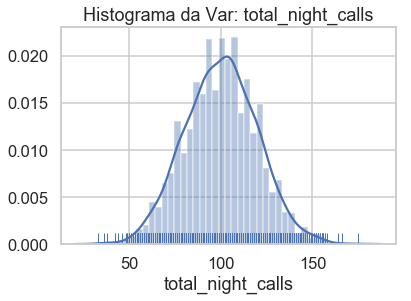

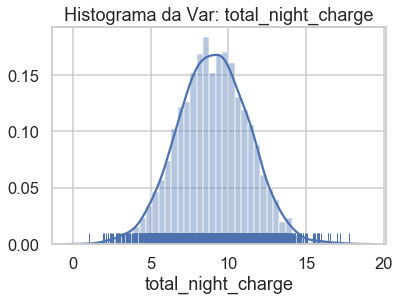

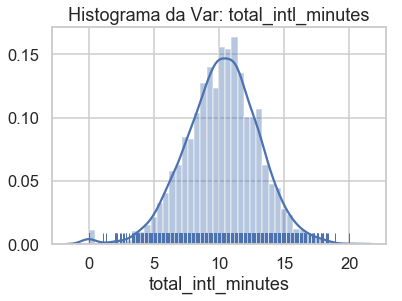

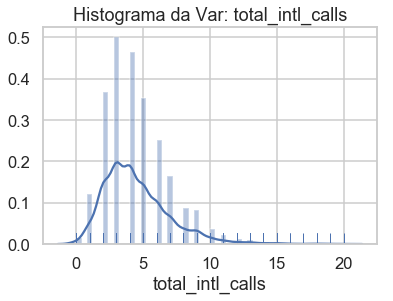

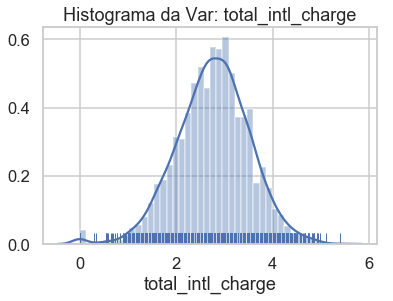

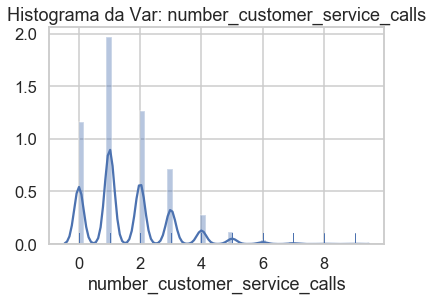

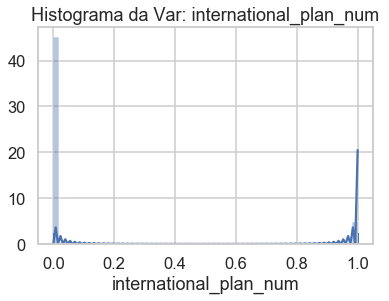

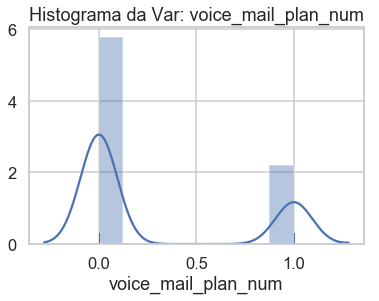

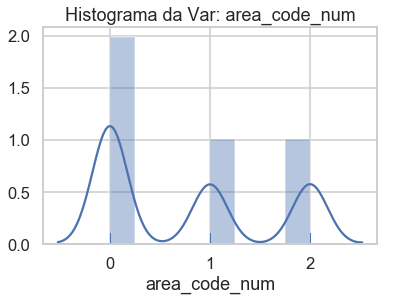

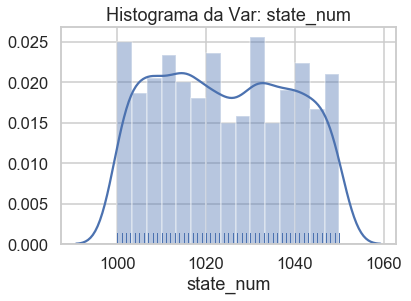

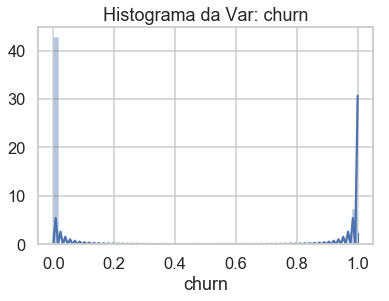

In [19]:
columnsDf = df_train.select_dtypes(exclude='category').columns

#loop
for i in columnsDf:
    sns.distplot(df_train[i], rug=True)
    plt.title('Histograma da Var: ' + i)
    plt.xlabel(i)
    plt.show()

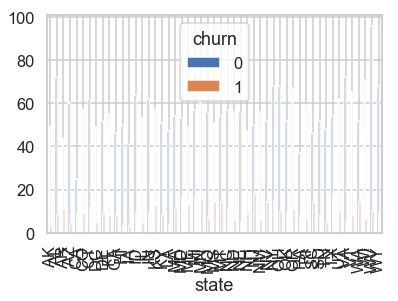

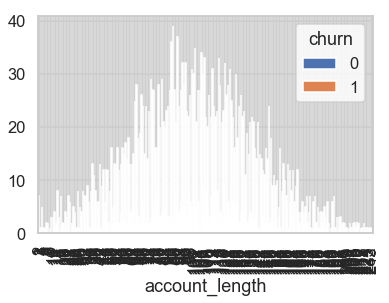

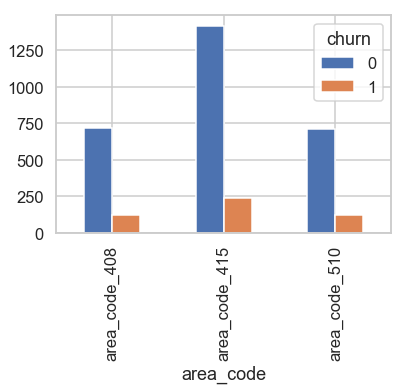

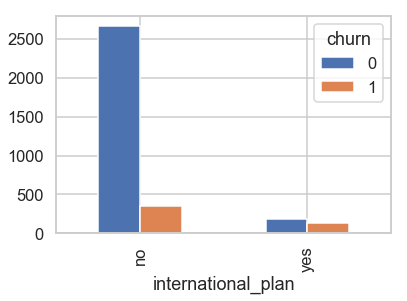

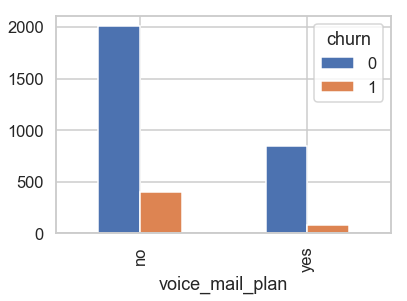

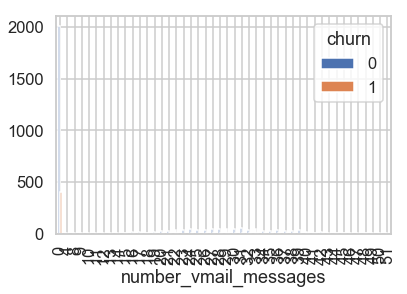

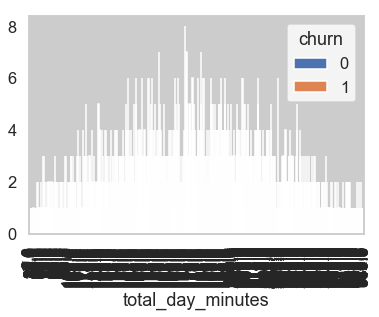

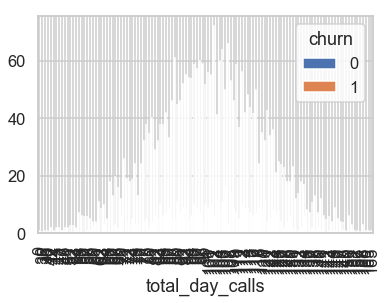

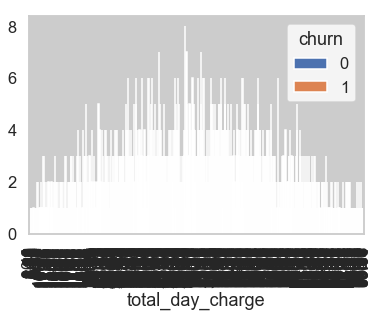

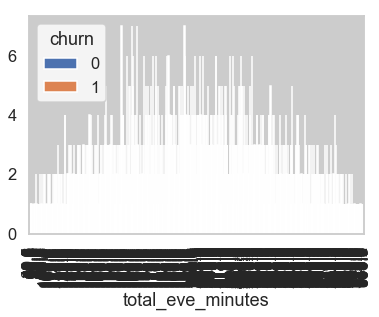

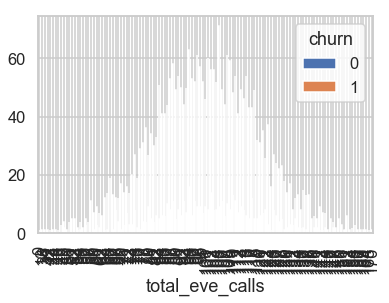

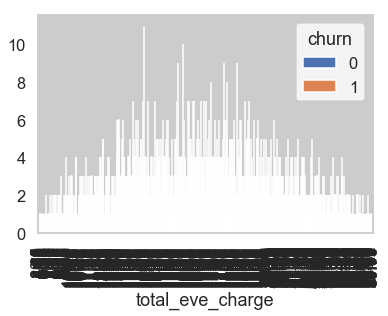

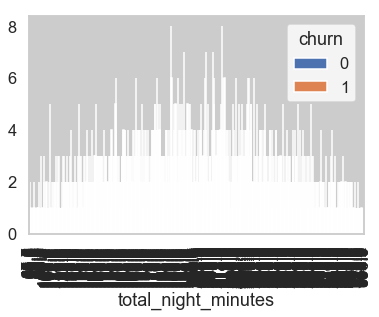

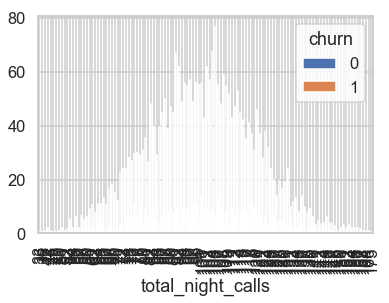

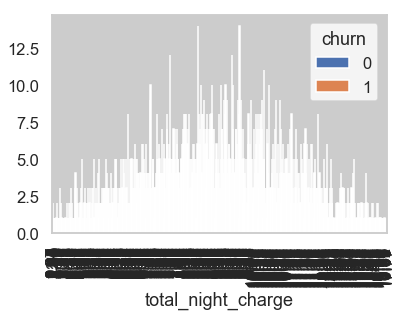

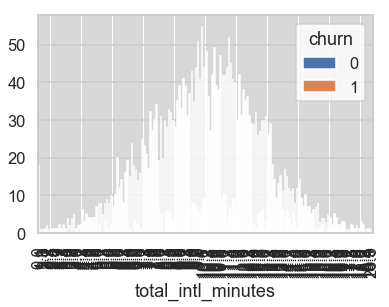

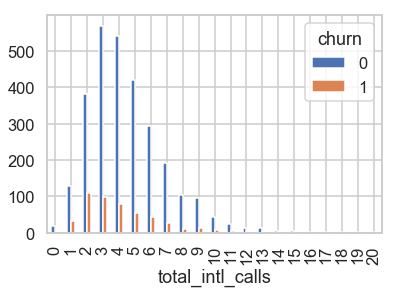

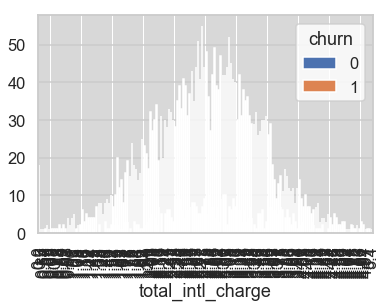

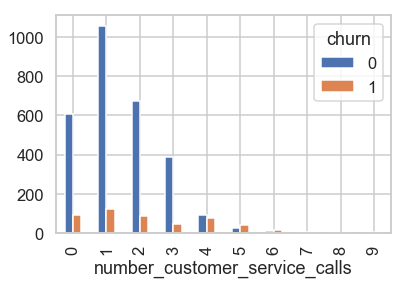

In [20]:
# Verificando qual a correlação categórica em relação a variável TARGET'churn'
colunmsCorr = [col for col in df_train.columns if col not in ['international_plan_num','voice_mail_plan_num','area_code_num','state_num','churn']]

for i in colunmsCorr:
    pd.crosstab(df_train[i], df_train.churn).plot(kind='bar')

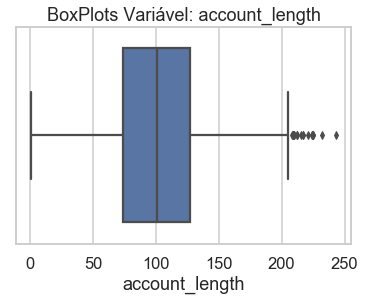

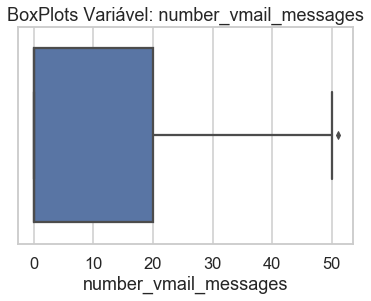

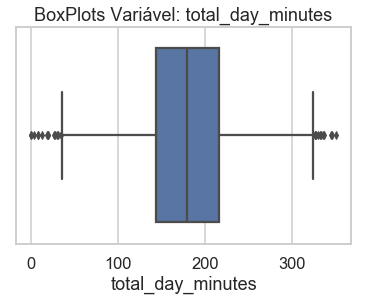

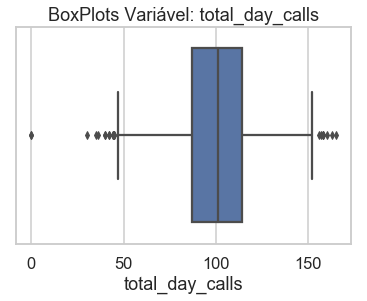

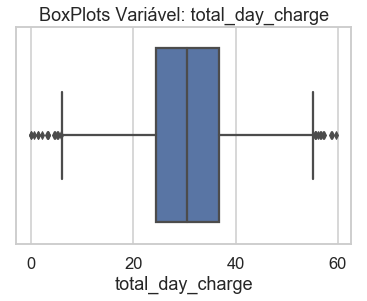

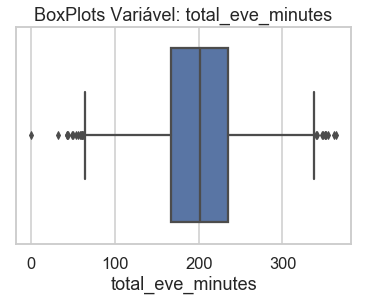

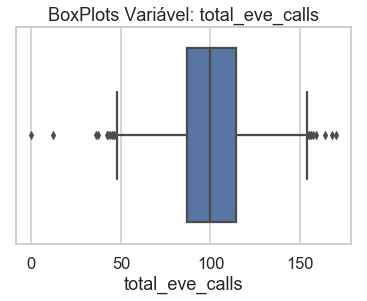

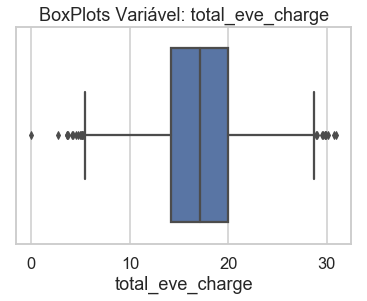

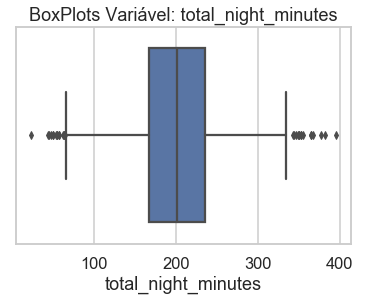

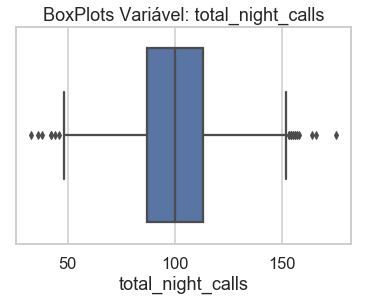

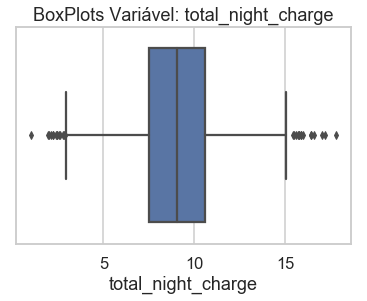

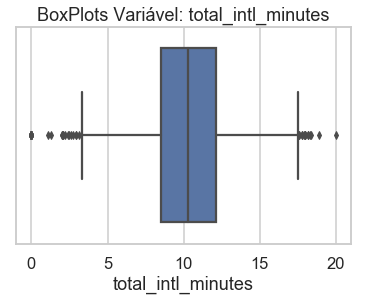

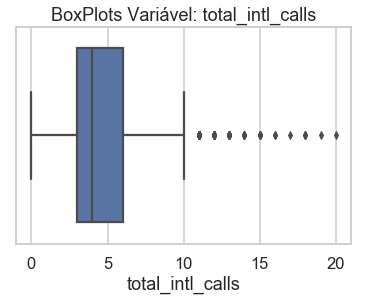

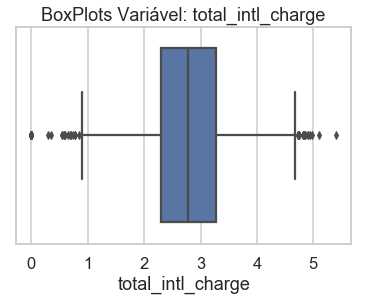

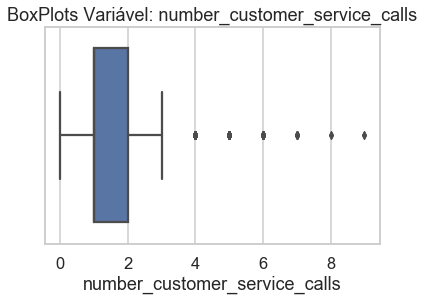

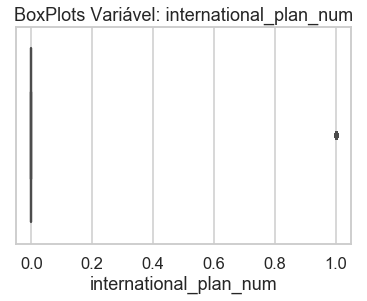

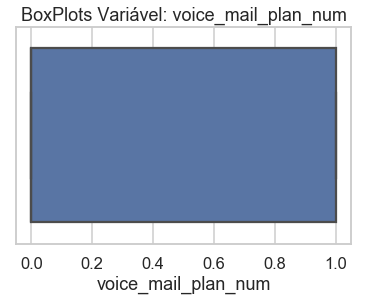

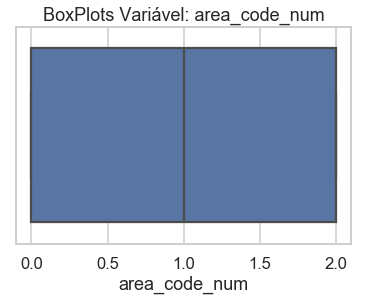

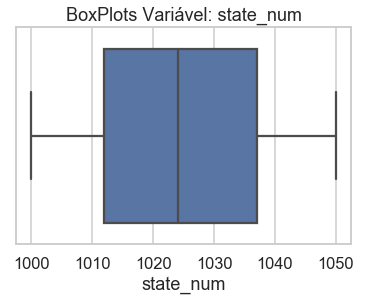

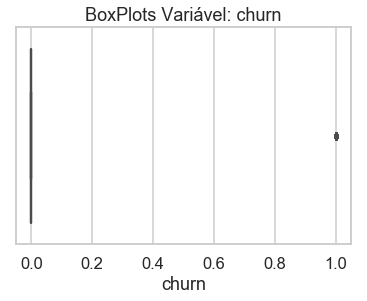

In [30]:
# Removendo os dados categóricos
columnsBox = df_train.select_dtypes(exclude='category').columns

for i in columnsBox:
    #ds_train[i].plot(kind = 'box')
    sns.boxplot(df_train[i])
    plt.title('BoxPlots Variável: ' + i)  
    plt.show()

Verificando a correlação entre as variáveis

In [32]:
df_train.corr()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,international_plan_num,voice_mail_plan_num,area_code_num,state_num,churn
account_length,1.000000,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.024735,0.002918,-0.006303,0.000816,0.016541
number_vmail_messages,-0.004628,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,0.008745,0.956927,-0.013083,-0.003014,-0.089728
total_day_minutes,0.006216,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.049396,-0.001684,-0.025474,-0.009719,0.205151
total_day_calls,0.038470,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.003755,-0.011086,-0.009313,-0.026499,0.018459
total_day_charge,0.006214,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.049398,-0.001686,-0.025478,-0.009718,0.205151
total_eve_minutes,-0.006757,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.019100,0.021545,0.005931,0.010167,0.092796
total_eve_calls,0.019260,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.006114,-0.006444,-0.018454,0.015524,0.009233
total_eve_charge,-0.006745,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.019106,0.021559,0.005954,0.010173,0.092786
total_night_minutes,-0.008955,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,-0.028905,0.006079,-0.017652,-0.001571,0.035493
total_night_calls,-0.013176,0.007123,0.022972,-0.019557,0.022972,0.007586,0.007710,0.007596,0.011204,1.000000,0.011188,-0.013605,0.000305,-0.013630,-0.012802,0.012451,0.015553,-0.001223,0.002445,0.006141


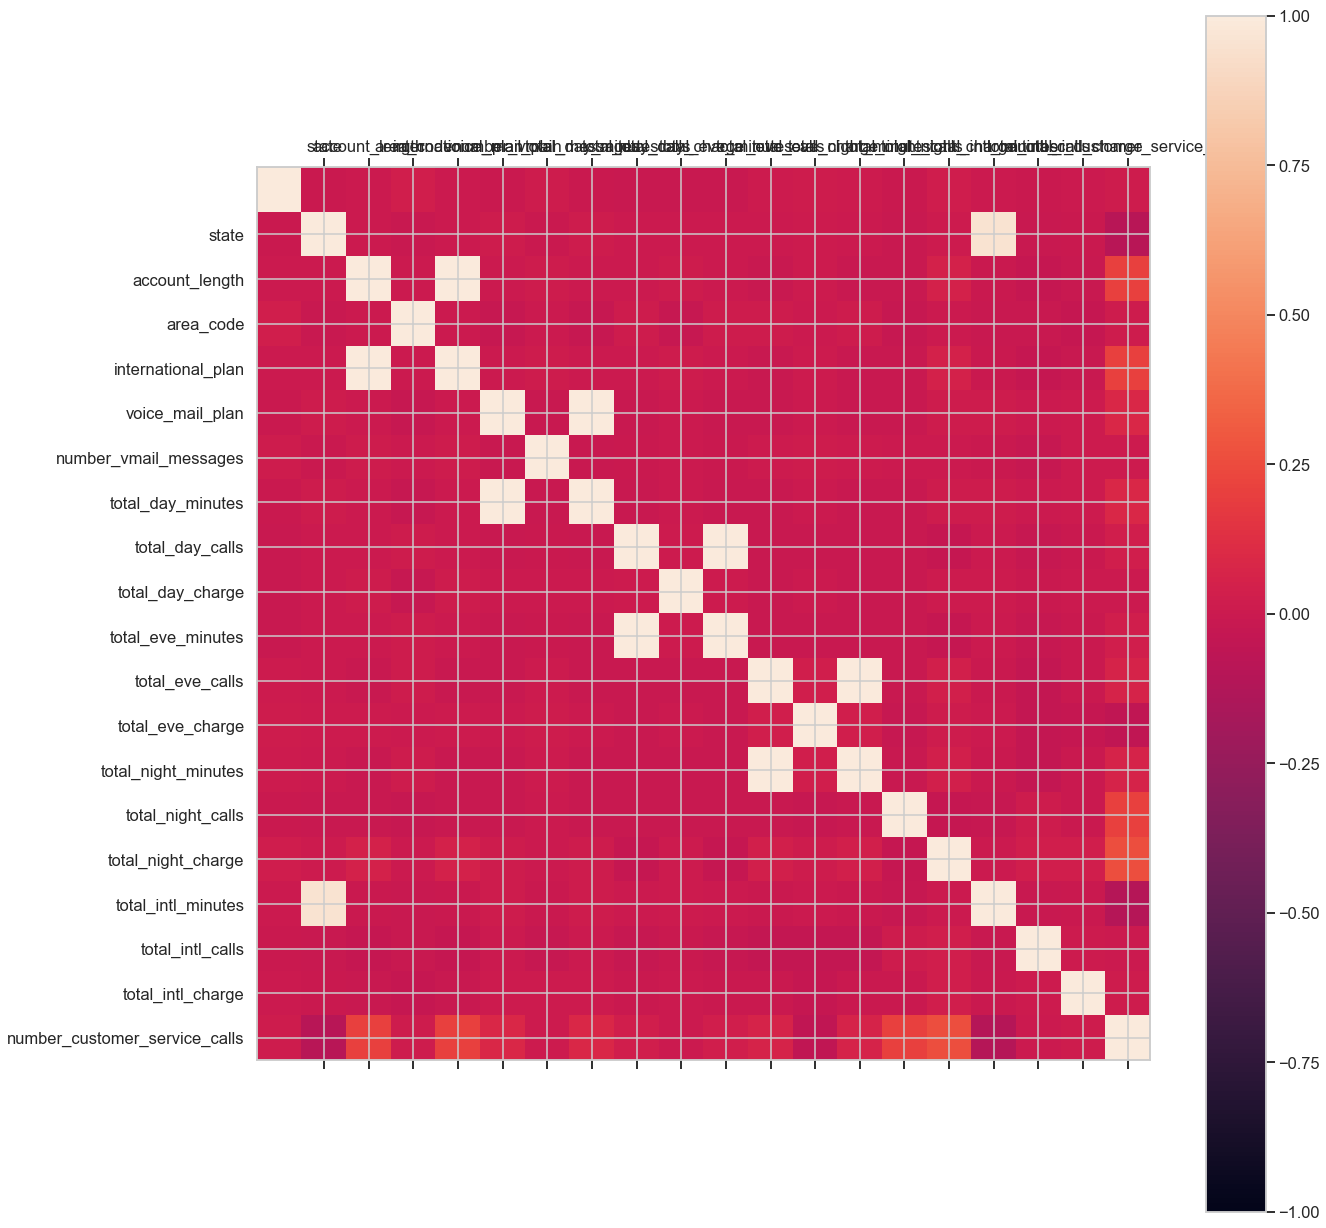

In [40]:
corr = df_train.corr()

fig = plt.figure(figsize=(20,22))
ax = fig.add_subplot(111)
cax = ax.matshow(corr, vmin = -1, vmax = 1)
fig.colorbar(cax)

#definindo tamanho do array
ticks = np.arange(1, 20, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df_train.columns)
ax.set_yticklabels(df_train.columns)
plt.show()

In [45]:
#Verificando a correlação da var TARGET (churn)
df_train.corr().churn

account_length                   0.016541
number_vmail_messages           -0.089728
total_day_minutes                0.205151
total_day_calls                  0.018459
total_day_charge                 0.205151
total_eve_minutes                0.092796
total_eve_calls                  0.009233
total_eve_charge                 0.092786
total_night_minutes              0.035493
total_night_calls                0.006141
total_night_charge               0.035496
total_intl_minutes               0.068239
total_intl_calls                -0.052844
total_intl_charge                0.068259
number_customer_service_calls    0.208750
international_plan_num           0.259852
voice_mail_plan_num             -0.102148
area_code_num                    0.007297
state_num                        0.021924
churn                            1.000000
Name: churn, dtype: float64

In [47]:
#Exibindo a correlção menor 0.01
df_train.corr().churn <= 0.01

account_length                   False
number_vmail_messages            True 
total_day_minutes                False
total_day_calls                  False
total_day_charge                 False
total_eve_minutes                False
total_eve_calls                  True 
total_eve_charge                 False
total_night_minutes              False
total_night_calls                True 
total_night_charge               False
total_intl_minutes               False
total_intl_calls                 True 
total_intl_charge                False
number_customer_service_calls    False
international_plan_num           False
voice_mail_plan_num              True 
area_code_num                    True 
state_num                        False
churn                            False
Name: churn, dtype: bool